In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *;
from sklearn import datasets


In [3]:
df = pd.read_csv("../DataSets/wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [6]:
df.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
df.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
X = df.data
y = df.target

In [11]:
X.shape

(178, 13)

In [12]:
y.shape

(178,)

In [28]:
from tabulate import tabulate

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,]
results = []

for i in test_sizes : 
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= i , random_state = 42)

    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    results.append([i+1, i, accuracy])

print(tabulate(results, headers=["sn", "test_sizes", "accuracy"], tablefmt= "grid"))


+------+--------------+------------+
|   sn |   test_sizes |   accuracy |
+======+==============+============+
|  1.1 |          0.1 |   0.722222 |
+------+--------------+------------+
|  1.2 |          0.2 |   0.722222 |
+------+--------------+------------+
|  1.3 |          0.3 |   0.740741 |
+------+--------------+------------+
|  1.4 |          0.4 |   0.694444 |
+------+--------------+------------+
|  1.5 |          0.5 |   0.662921 |
+------+--------------+------------+
|  1.6 |          0.6 |   0.663551 |
+------+--------------+------------+
|  1.7 |          0.7 |   0.664    |
+------+--------------+------------+
|  1.8 |          0.8 |   0.706294 |
+------+--------------+------------+
|  1.9 |          0.9 |   0.68323  |
+------+--------------+------------+


In [29]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[48,  7,  1],
       [ 2, 42, 17],
       [ 1, 23, 20]])

In [37]:
targetname = df.target
report  = classification_report(y_test, y_pred, target_names = df.target_names)
report

'              precision    recall  f1-score   support\n\n     class_0       0.94      0.86      0.90        56\n     class_1       0.58      0.69      0.63        61\n     class_2       0.53      0.45      0.49        44\n\n    accuracy                           0.68       161\n   macro avg       0.68      0.67      0.67       161\nweighted avg       0.69      0.68      0.68       161\n'

In [44]:
df = pd.DataFrame(df.data , columns = df.feature_names)
corrmat = df.corr()



AttributeError: 'DataFrame' object has no attribute 'data'

In [43]:
plt.figure(figsize = ( 20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Axes: >

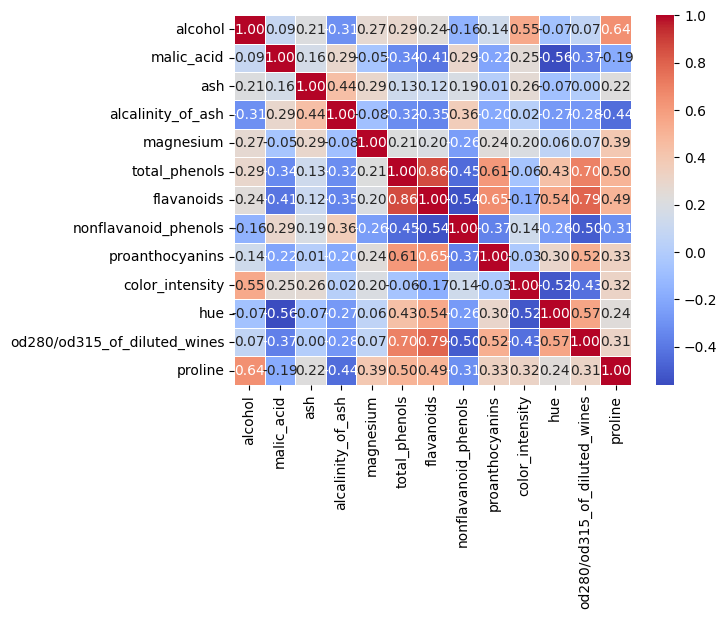

In [51]:
sns.heatmap(corrmat, annot = True, cmap = "coolwarm", fmt=".2f", linewidths= 0.5)

Text(0, 0.5, 'Predicted data')

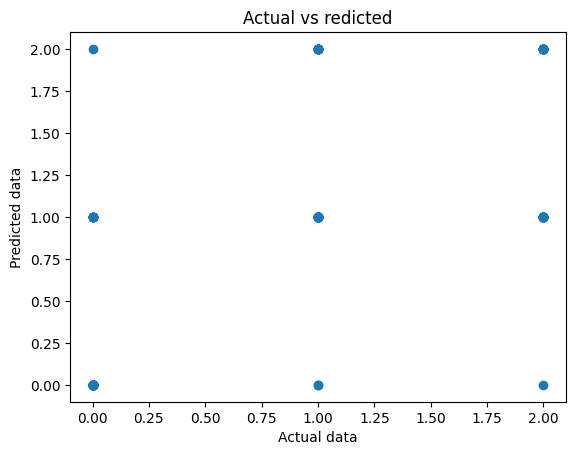

In [68]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs redicted")
plt.xlabel("Actual data")
plt.ylabel("Predicted data")


In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= X, y = y , data=df, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression line')


ValueError: Per-column arrays must each be 1-dimensional

<Figure size 1000x600 with 0 Axes>